In [1]:
import awkward as ak
import pandas as pd
import hist
import numpy as np
import uproot
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

In [3]:
from particle import Particle

In [5]:
Particle.from_pdgid(1)

<Particle: name="d", pdgid=1, mass=4.67 + 0.50 - 0.20 MeV>

In [2]:
fileRoot = uproot.open('./sim_outputs/roots/DM_gSq_only.root')

In [6]:
fname = './sim_outputs/roots/DM_gSq_only.root'
events = NanoEventsFactory.from_root(fname, schemaclass=DelphesSchema).events()

In [7]:
PIDs = events.Particle.PID.compute()

In [8]:
hist = np.histogram(PIDs[0], bins=np.arange(min(PIDs[0]), max(PIDs[0])))
print(hist[1])

[-3222, -3221, -3220, -3219, -3218, -3217, ..., 3219, 3220, 3221, 3222, 3223]


In [14]:
import particle

In [23]:
p = particle.PDGID(211)
print(p.charge)

1.0


In [21]:
print(Particle.from_pdgid(p))

pi+


In [24]:
newP = {-54: 'y0bar', -52: 'chibar', 52:'chi', 54:'y0'}

In [27]:
Particle.from_pdgid(-3222)

<Particle: name="Sigma~-", pdgid=-3222, mass=1189.37 ± 0.07 MeV>

In [25]:
from tqdm import tqdm

In [32]:
counts = {'neutralHadrons':[],'chargedHadrons':[]}
for nEvent in tqdm(range(len(PIDs))):
    rango = np.arange(min(PIDs[nEvent])-0.5, max(PIDs[nEvent])+0.5)
    hist = np.histogram(PIDs[nEvent], bins=rango)
    neutralHadrons = 0
    chargedHadrons = 0
    for partIDs in range(len(hist[1])-1):
        try:
            part = particle.PDGID(hist[1][partIDs]+0.5)
            partName = Particle.from_pdgid(part)
        except:
            if hist[0][partIDs] == 0:
                continue
            elif hist[1][partIDs]+0.5 in newP.keys():
                part = newP[hist[1][partIDs]+0.5]
            else:
                print(hist[1][partIDs]+0.5, partIDs)
        try:
            if part.is_hadron:
                if part.charge != 0:
                    chargedHadrons += hist[0][partIDs]
                else:
                    neutralHadrons += hist[0][partIDs]
        except AttributeError:
            pass
        else:
            try:
                    counts[part].append(hist[0][partIDs])
            except KeyError:
                counts[part] = [0 for i in range(nEvent)]
                counts[part].append(hist[0][partIDs])
    counts['neutralHadrons'].append(neutralHadrons)
    counts['chargedHadrons'].append(chargedHadrons)

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 7/50000 [00:21<38:28:25,  2.77s/it]

-5324.0 0


  0%|          | 25/50000 [01:30<47:43:18,  3.44s/it]

-20413.0 0


  0%|          | 45/50000 [03:06<72:52:02,  5.25s/it] 

5214.0 8426


  0%|          | 83/50000 [05:12<68:16:44,  4.92s/it]

-20413.0 0


  0%|          | 137/50000 [09:03<38:00:38,  2.74s/it]

5212.0 15525


  0%|          | 153/50000 [10:15<60:02:33,  4.34s/it]

-5324.0 0


  1%|          | 283/50000 [55:33<57:08:26,  4.14s/it]   

-5214.0 14999


  1%|          | 371/50000 [1:00:36<78:48:46,  5.72s/it]

-20413.0 0


  1%|          | 399/50000 [1:03:35<123:16:59,  8.95s/it]

-20413.0 0


  1%|          | 437/50000 [1:07:47<67:10:47,  4.88s/it] 

-20413.0 0


  1%|          | 531/50000 [2:19:04<120:28:57,  8.77s/it]  

-20413.0 0


  1%|          | 563/50000 [2:20:25<55:21:10,  4.03s/it] 

4124.0 7236


  1%|          | 580/50000 [2:21:15<28:05:09,  2.05s/it]

4124.0 7348


  1%|          | 622/50000 [2:23:20<38:01:06,  2.77s/it]

-20413.0 0


  1%|          | 624/50000 [2:23:27<38:59:19,  2.84s/it]

-5312.0 0


  1%|▏         | 653/50000 [2:56:39<989:28:21, 72.18s/it]  

-20413.0 0


  2%|▏         | 822/50000 [4:41:24<31:17:51,  2.29s/it]   

-20413.0 0


  2%|▏         | 916/50000 [4:46:12<44:49:00,  3.29s/it]

-20413.0 10


  2%|▏         | 931/50000 [4:47:07<48:29:45,  3.56s/it]

-5214.0 0


  2%|▏         | 952/50000 [4:48:28<62:59:35,  4.62s/it] 

-5214.0 0


  2%|▏         | 1064/50000 [5:26:02<47:59:35,  3.53s/it]  

-20413.0 0


  2%|▏         | 1080/50000 [6:01:19<203:37:02, 14.98s/it]  

-20413.0 0


  2%|▏         | 1128/50000 [6:35:31<82:44:45,  6.10s/it]   

-20413.0 0


  2%|▏         | 1183/50000 [6:38:20<36:45:37,  2.71s/it]

5214.0 8426


  3%|▎         | 1253/50000 [6:41:34<48:51:37,  3.61s/it]

-20413.0 0


  3%|▎         | 1338/50000 [8:24:39<92:19:45,  6.83s/it]   

-5212.0 0


  3%|▎         | 1401/50000 [8:59:38<53:43:18,  3.98s/it]   

-20413.0 0


  3%|▎         | 1439/50000 [9:32:40<2643:02:28, 195.94s/it]

-4124.0 998


  3%|▎         | 1453/50000 [9:33:11<52:13:52,  3.87s/it]   

-5214.0 15099


  3%|▎         | 1467/50000 [10:05:46<1884:55:22, 139.82s/it]

-543.0 4681


  3%|▎         | 1476/50000 [10:06:20<123:07:11,  9.13s/it]  

-20413.0 0


  3%|▎         | 1497/50000 [10:07:21<38:23:43,  2.85s/it] 

-20413.0 0


  3%|▎         | 1566/50000 [10:12:05<68:46:34,  5.11s/it] 

-5214.0 0


  3%|▎         | 1607/50000 [10:14:05<28:35:12,  2.13s/it]

-20413.0 0


  3%|▎         | 1673/50000 [10:17:15<43:40:05,  3.25s/it]

-20413.0 0


  3%|▎         | 1744/50000 [10:20:38<27:21:28,  2.04s/it]

-20413.0 0


  4%|▍         | 1879/50000 [10:59:17<37:47:01,  2.83s/it]   

-20413.0 0


  4%|▍         | 1909/50000 [11:00:38<33:12:19,  2.49s/it]

-5214.0 0


  4%|▍         | 1936/50000 [11:01:44<22:58:48,  1.72s/it]

-5214.0 14999


  4%|▍         | 1939/50000 [11:01:55<36:46:30,  2.75s/it]

5212.0 25425


  4%|▍         | 2158/50000 [11:45:49<43:59:06,  3.31s/it]   

-20413.0 0


  4%|▍         | 2172/50000 [11:46:25<33:56:02,  2.55s/it]

In [1]:
counts

NameError: name 'counts' is not defined

In [9]:
dicta['b']

KeyError: 'b'

In [3]:
fileRoot.keys()

['ProcessID0;1', 'Delphes;1']

In [4]:
type(fileRoot['ProcessID0'])

uproot.dynamic.Model_TProcessID_v1

In [5]:
type(fileRoot['Delphes'])

uproot.models.TTree.Model_TTree_v20

In [6]:
min(fileRoot['Delphes']['Particle/Particle.PID'].array()[0])

-3222

In [7]:
any(fileRoot['Delphes']['Particle/Particle.PID'].array()[0] == 0)

False

In [ ]:
PID = {}

In [ ]:
counts = {}

In [37]:
len(fileRoot['Delphes']['Particle/Particle.PID'].array())

50000

In [ ]:
counts = {}
for i in len(fileRoot['Delphes']['Particle/Particle.PID'].array()):
    values = fileRoot['Delphes']['Particle/Particle.PID'].array()[i]
    rango = np.arange(min(values)-0.5, max(values)+0.5)

[-3222.5 -3221.5 -3220.5 ...  3221.5  3222.5  3223.5]


KeyboardInterrupt: 

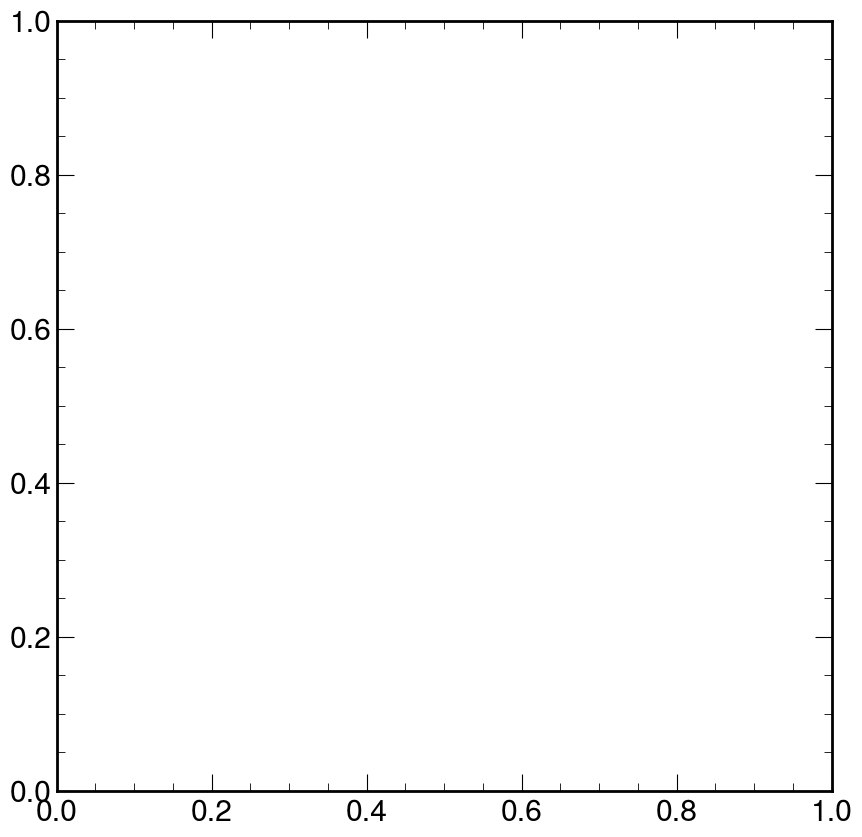

In [3]:
values = fileRoot['Delphes']['Particle/Particle.PID'].array()[0]
rango = np.arange(min(values)-0.5, max(values)+0.5)
print(rango)
yvalues, bins, hist = plt.hist(values, bins=rango);
counts = {}
for i in range(len(bins)-1):
    if yvalues[i] > 0:
        counts[str(bins[i]+0.5)] = [yvalues[i]]

In [36]:
pd.DataFrame(counts)

,-3222.0,-3112.0,-2224.0,-2212.0,-2112.0,-531.0,-431.0,-411.0,-321.0,-313.0,...,423.0,431.0,531.0,2103.0,2112.0,2203.0,2212.0,2224.0,3112.0,3122.0
0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,2.0,...,1.0,1.0,1.0,2.0,1.0,2.0,7.0,4.0,1.0,1.0


In [8]:
rango = [-37,-21,-18,-11,-9,0,9,11,18,21,37]

In [8]:
rango = np.arange(-60.5, 60.5, 1)

[]

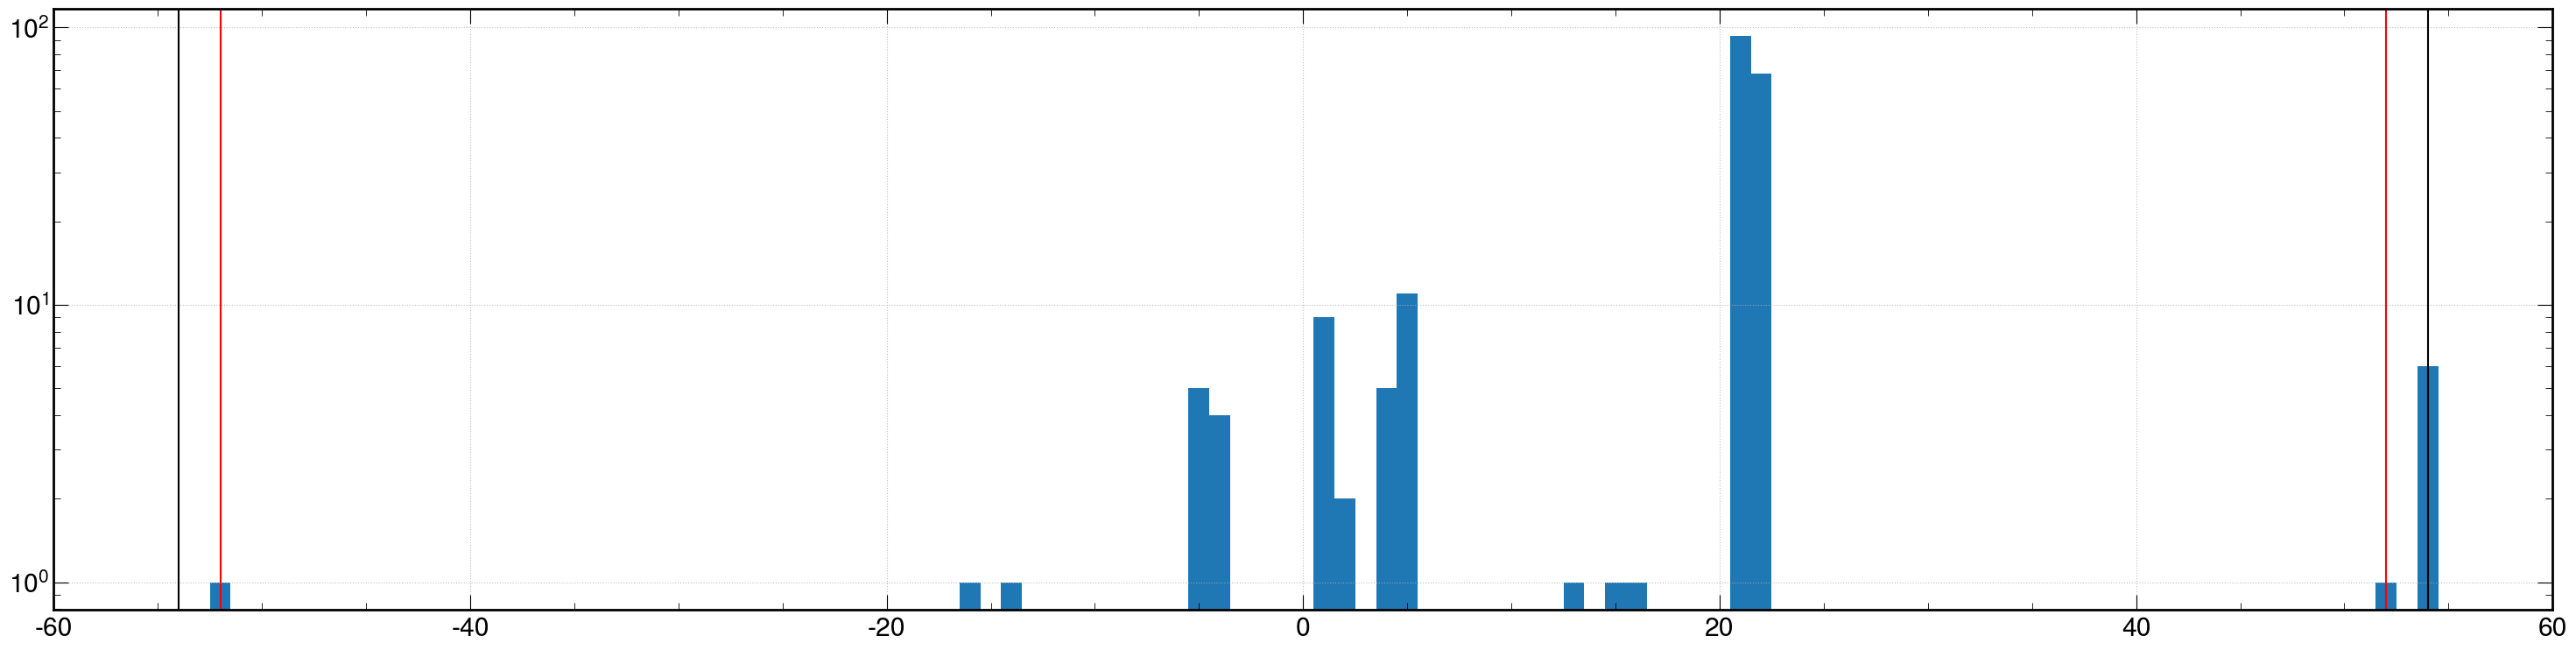

In [19]:
fig, ax = plt.subplots(figsize=(30,8))
ax.hist(fileRoot['Delphes']['Particle/Particle.PID'].array()[0], bins=rango)
ax.grid()
#ax.set_xticks(np.arange(-37, 38, 1))
ax.set_xlim(-60,60)
ax.axvline(52, color='r')
ax.axvline(-52, color='r')
ax.axvline(54, color='k')
ax.axvline(-54, color='k')
ax.set_yscale('log')
fig.tight_layout()
plt.plot()

[]

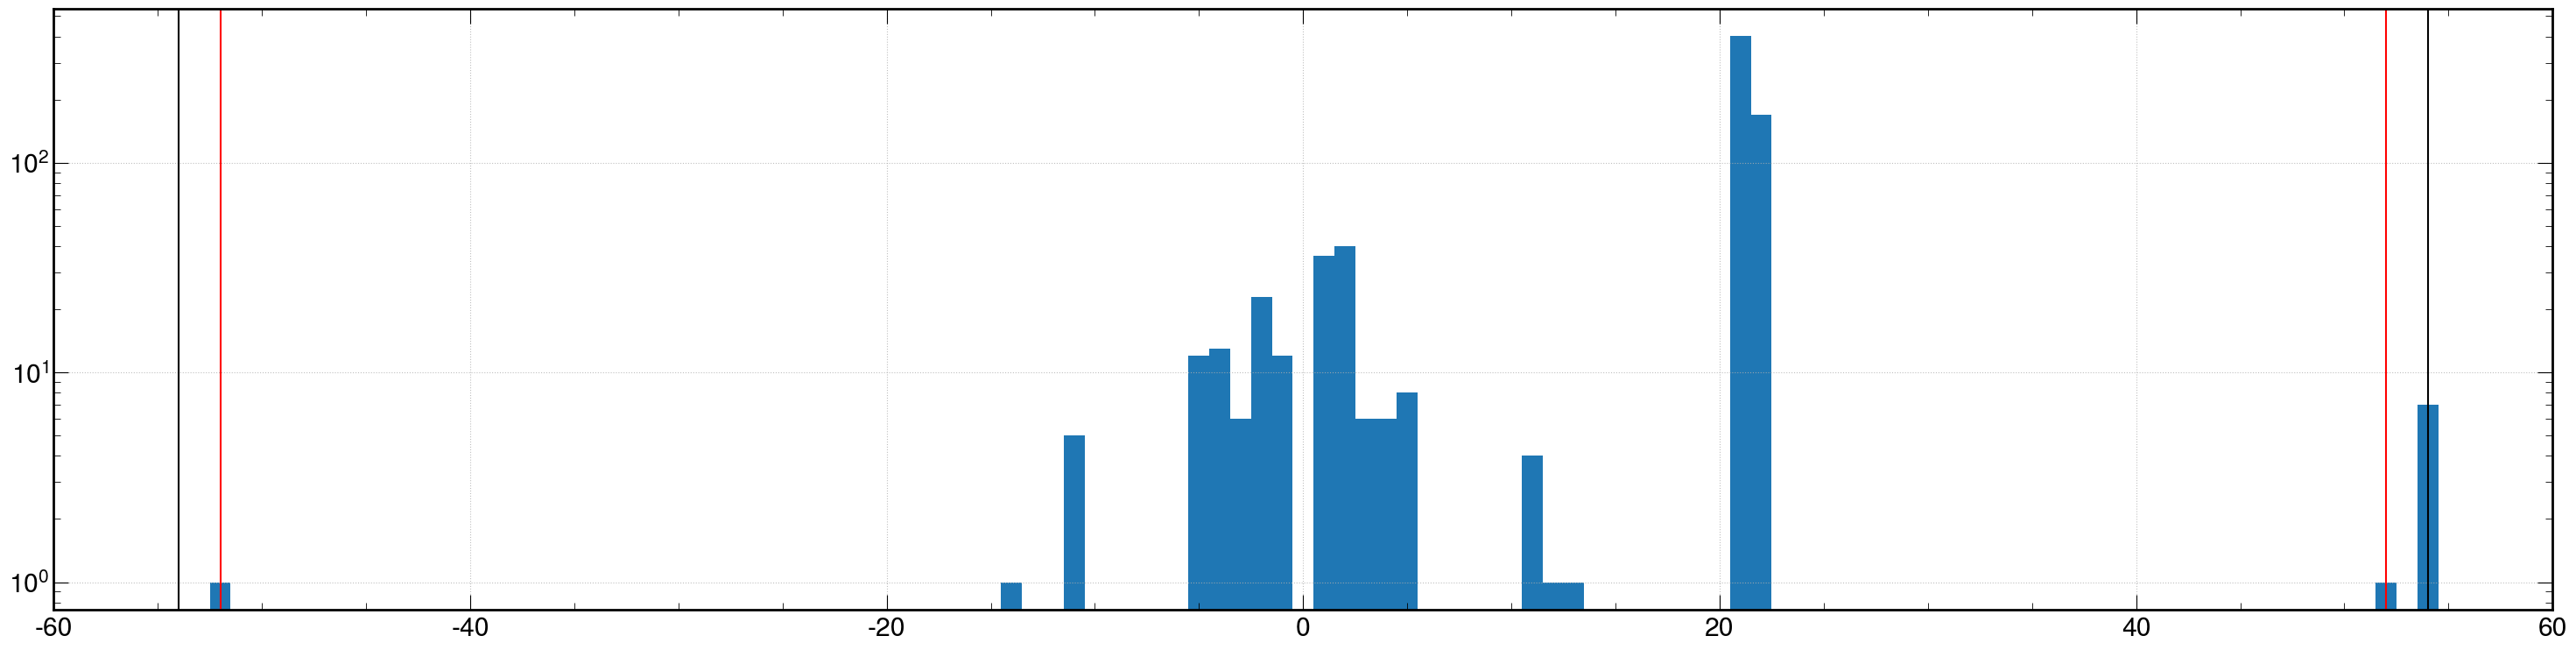

In [20]:
fig, ax = plt.subplots(figsize=(30,8))
ax.hist(fileRoot['Delphes']['Particle/Particle.PID'].array()[1], bins=rango)
ax.grid()
#ax.set_xticks(np.arange(-37, 38, 1))
ax.set_xlim(-60,60)
ax.axvline(52, color='r')
ax.axvline(-52, color='r')
ax.axvline(54, color='k')
ax.axvline(-54, color='k')
ax.set_yscale('log')
fig.tight_layout()
plt.plot()

[]

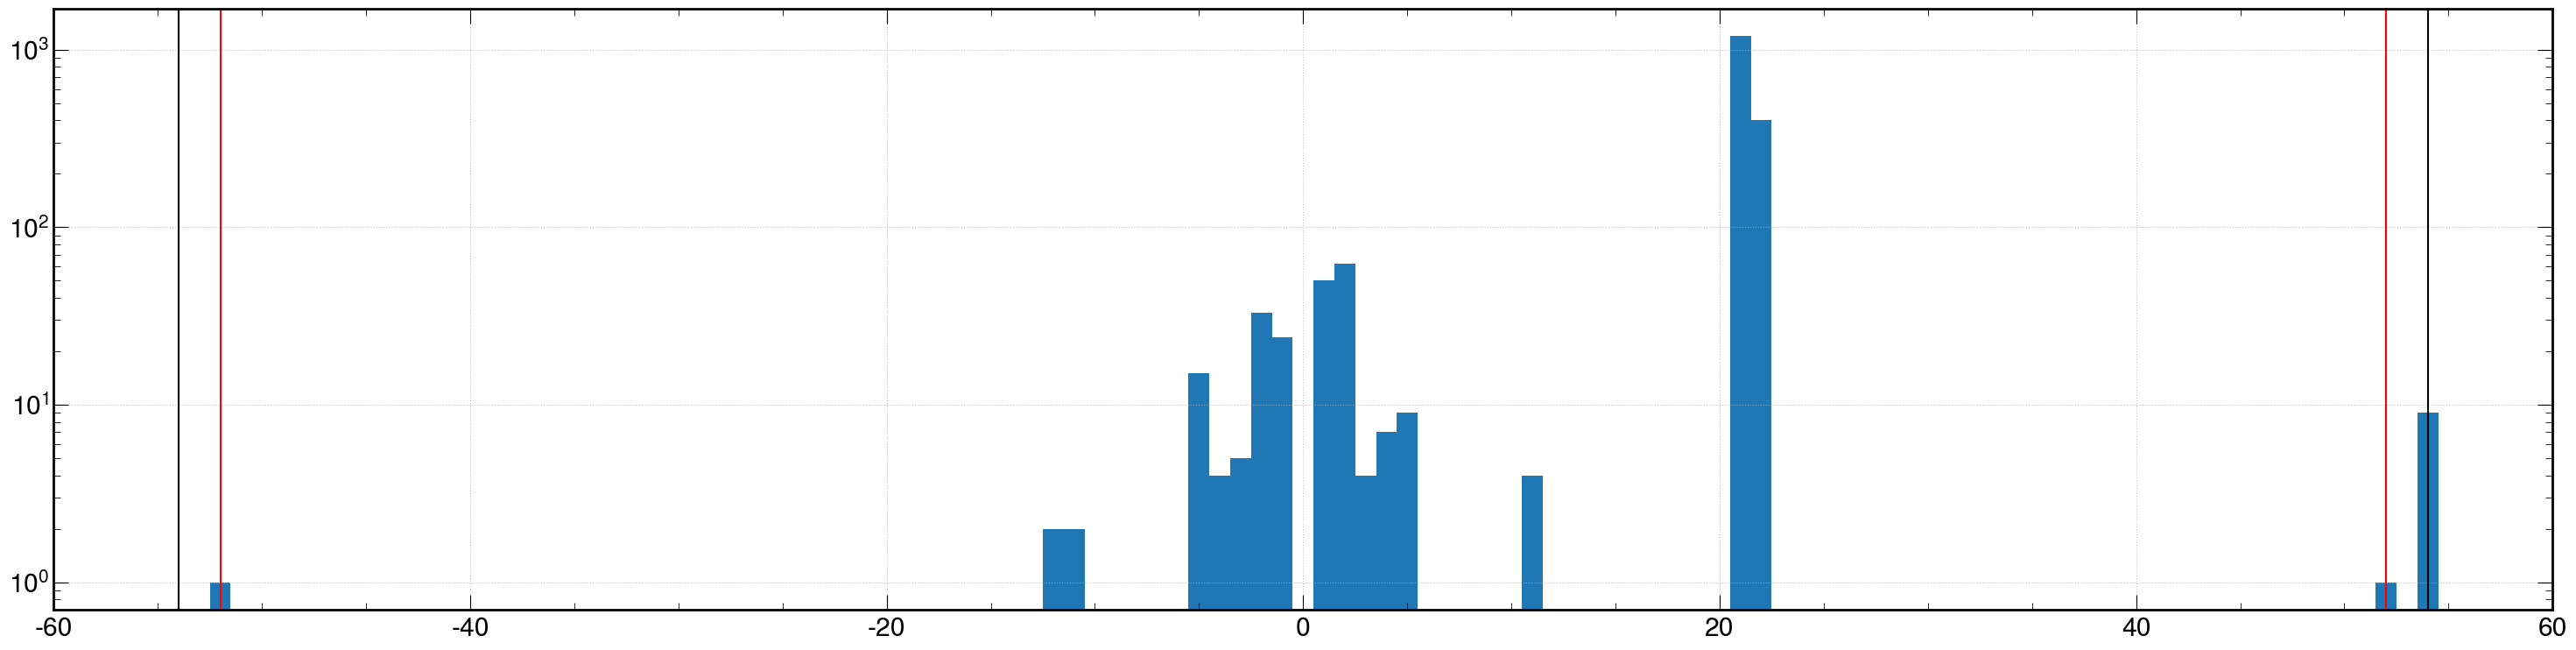

In [21]:
fig, ax = plt.subplots(figsize=(30,8))
ax.hist(fileRoot['Delphes']['Particle/Particle.PID'].array()[-1], bins=rango)
ax.grid()
#ax.set_xticks(np.arange(-37, 38, 1))
ax.set_xlim(-60,60)
ax.axvline(52, color='r')
ax.axvline(-52, color='r')
ax.axvline(54, color='k')
ax.axvline(-54, color='k')
ax.set_yscale('log')
fig.tight_layout()
plt.plot()